# COGS 108 - Final Project 

# Overview

I decided to analyze whether the racial and socioeconomic demographics of a neighborhood impacted the average rating and number of reviews of different types of restaurants in the same neighborhood. Using data from Yelp and public demographics from the government, I was able to combine these two sets to observe the relationship between variables. I have concluded that there is no significant relationship between these factors and a linear model is not a predictive model for this specific topic. 

# Name & GitHub

- Name: Anahita Afshari
- PID: A12658971
- GitHub Username: anahitaafsh

# Research Question

Yelp has modernized the way people rate and review restaurants nationwide, but is this the same on a local, neighborhood scale? More specifically, does a neighborhood's median income levels and racial demographic have an impact on the types of cuisines reviewed on Yelp in that area, or how they are rated? Is there a trend between different higher income neighborhoods preferring the same type of food? 

In short, what is the relationship between a neighborhood's demographics and the Yelp information based on places in their neighborhood?

## Background and Prior Work

The food industry as it relates to household income and diversity has been a popular topic for a while, because the restaurant industry relies on consistent customers, so optimizing their chances for a successful business rely heavily on being located in the right neighborhood (1). The National Restaurant Association. considers "growth in the number of higher-income households is a positive sign for restaurants, as this demographic group represents the majority of spending in the industry," (1). This alone seems to indicate that more successful restaurants exist in higher income neighborhoods, but I have not found anything yet on what those types of restaurants they are, and how diverse the restaurant food options are in those higher income neighborhoods. According to data from to the Bureau of Labor Statistics, in 2015, "households with incomes of over $100,000 are responsible for 42% of the total spending in the food-away-from-home industry," while households under that threshold, "account for only 18% of the spending," (4), and because this is a relatively recent development, more studies may be done to investigate this relationship between restaurants and the median income of different neighborhoods.

This topic is also popular because it can give insight on poverty and obesity patterns and how they affect specific races over others. Two studies, one from the Harvard School of Public Health (2) and one from the American Journal of Preventative Medicine, (3) were investigating the relationship between access to unhealthy food and obesity, specifically in black neighborhoods, and these were two of many other studies that exist on this topic specifically (5). One study even found that black, low-income neighborhoods have approximately 2.4 times the number of unhealthy restaurants, compared to 1.5 unhealthy restaurants in predominantly white neighborhoods (3), suggesting that the quality of food in lower income neighborhoods is lower because the neighborhood scene is flooded with more unhealthy and cheap options that pull away customers. 

References:
1. https://wahospitality.org/blog/how-does-household-income-growth-affect-restaurants/
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4783380/
3. https://www.ajpmonline.org/article/S0749-3797(04)00139-4/pdf
4. https://www.bls.gov/opub/ted/2016/high-income-households-spent-half-of-their-food-budget-on-food-away-from-home-in-2015.htm
5. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3482049/

# Hypothesis

I hypothesize, taking into account an assumption that wealthier neighborhoods will have a lower percent of nonwhite residents based on general knowledge of white people being wealthier in our country as opposed to nonwhite people, that both the ratings and reviews will go up as the percent of nonwhite people lowers and the median income increases. I also think that traditionally more expensive cuisine foods, like sushi, will be favored among areas with a higher median income, because they can afford that luxury.

# Dataset(s)

Dataset Name: zipcodes.csv
Link to the dataset: provided by our professor
Number of observations: 38

This dataset provides demographic information on a list of zip codes for a specific county. For each of the 38 zip codes, it provides that neighborhood's median family and household incomes, the per capita incomes of that area, the percent of families below the poverty line, percent of people who receive SNAP benefits and supplemental security incomes, and the percent of nonwhite residents.

| Column Name | Description |
| --- | --- |
| zip | zip code of neighborhood |
| median_family_income_dollars | neighborhood's median income based on family size |
| median_household_income_dollars | neighborhood's median income based on household size |
| per_capita_income_dollars | neighborhood's per capita income |
| percent_damilies_below_poverty_line | neighborhood's % of residents below poverty line |
| percent_snap_benefits | neighborhood's % SNAP benefits |
| percent_supplemental_security_income | neighborhood's % of people on supplemental security income |
| percent_nonwhite | neighborhood's % of nonwhite residents |

In an ideal world, this dataset would have significantly more observations from a variety of zip codes expanding over many different states, instead of this small subset from a specific county.

Dataset Name: yelp.csv
Link to dataset: provided by our professor
Number of observations: 3688

| Column Name | Description |
| --- | --- |
| id | Yelp's id of the restaurant |
| name | name of restaurant |
| is_closed | whether or not the restaurant is closed |
| rating | Yelp's user generated rating |
| review_count | number of reviews |
| address1 | address of restaurant |
| zip_code | zip code of restaurant |
| latitude | latitudinal coordinate of restaurant's address |
| longitude | longitudinal coordinate of restaurant's address |
| price | Yelp's categorization of average price of the overall restaurant's offerings |
| phone | phone number of restaurant |
| hotdogs | Yelp's categorization of if this is a hot dog place |
| sandwiches | Yelp's categorization of if this is a sandwich place |
| pizza | Yelp's categorization of if this is a pizza place |
| tradamerican | Yelp's categorization of if this is a 'traditional american' place |
| burgers | Yelp's categorization of if this is a burger place |
| mexican | Yelp's categorization of if this is a mexican place |
| grocery | Yelp's categorization of if this is a grocery store |
| breakfast_brunch | Yelp's categorization of if this is a brunch place |
| coffee | Yelp's categorization of if this is a coffee place |
| chinese | Yelp's categorization of if this is a chinese place |
| italian | Yelp's categorization of if this is a italian place |
| newamerican | Yelp's categorization of if this is a 'new american' place |
| chicken_wings | Yelp's categorization of if this is a chicken wing place |
| delis | Yelp's categorization of if this is a deli |
| bars | Yelp's categorization of if this is a bar |
| salad | Yelp's categorization of if this is a salad place |
| seafood | Yelp's categorization of if this is a seafood place |
| bbq | Yelp's categorization of if this is a bbq place |
| bakeries | Yelp's categorization of if this is a bakery |
| sushi | Yelp's categorization of if this is a sushi place |

This dataset provides information from restaurants listed on Yelp. Yelp has many categories for sorting restaurants, and the right half of the dataset is a boolean table, just indicating what type of place Yelp categorizes this restaurant. On the right half of the dataset, it includes identifying information for each restaurant, including its name, address, zip code, phone number, and latitude and longitude. The last bit of information that this dataset provides is Yelp's own content, meaning the number of reviews, average price as decided by Yelp, and average rating listed on Yelp.

I am combining this dataset through zip codes, which are the only common factor that can link the data.

# Setup

In [24]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.metrics import r2_score

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [25]:
# Loading files
df_zips = pd.DataFrame(pd.read_csv('zipcodes.csv'))
df_cuisines = pd.read_csv('yelp.csv')

# Data Cleaning

To clean the zipcodes data, I selected the three variables I needed and dumped the rest. I need zip code information to match up this data to the other set, and the two variables I will be observing are the percent of nonwhite people, and the median income of a neighborhood, so I kept those.

I also divided the median incomes by 1000 to make visualization easier, so values are now in the thousands of dollars instead of just dollars.

In [26]:
# Cleaning Zip Code Data
df_zipcodes = df_zips.drop(columns=['median_family_income_dollars','percent_snap_benefits', 
                                        'percent_supplemental_security_income',
                                       'percent_damilies_below_poverty_line','per_capita_income_dollars'])
df_zipcodes.columns=['zip', 'median income', "% nonwhite"]
df_zipcodes = df_zipcodes.dropna()
df_zipcodes = df_zipcodes.drop_duplicates(subset='zip')
df_zipcodes['median income'] = df_zipcodes['median income'].transform(lambda x: x/1000) 

In [27]:
# Cleaning Yelp Data
df_cuisines = df_cuisines.drop(columns=['name','address1','latitude','longitude','price','phone',
                               'hotdogs', 'sandwiches', 'pizza', 'burgers', 'chicken_wings',
                               'salad','bbq', 'seafood','breakfast_brunch','tradamerican',
                               'newamerican','grocery','coffee','delis','bars','bakeries'])
df_cuisines.columns = ['id','is_closed','rating','# reviews','zip', 'mexican','chinese','italian','sushi']

# Dropping closed places
df_cuisines['is_closed'] = df_cuisines['is_closed'].astype(int)
df_cuisines = df_cuisines[df_cuisines['is_closed'] == 0]
df_cuisines = df_cuisines.drop(columns=['is_closed'])

# Dropping duplicates of the same place
df_cuisines = df_cuisines.drop_duplicates(subset='id')
df_cuisines = df_cuisines.drop(columns=['id'])
df_cuisines = df_cuisines.sort_values(by=['zip'])
df_cuisines = df_cuisines.dropna()

# Turning booleans to integers
df_cuisines = df_cuisines.applymap(lambda x: 0 if x == False else x)
df_cuisines = df_cuisines.applymap(lambda x: 1 if x == True else x)

# Only looking at places that are reviewed
df_cuisines = df_cuisines[df_cuisines['# reviews'] != 0]

In [28]:
# Now I am transforming the boolean values into an easier and cleaner way to see the type of food
conditions = [
    df_cuisines['mexican'] != 0,
    df_cuisines['chinese'] != 0,
    df_cuisines['italian'] != 0,
    df_cuisines['sushi'] != 0
]

outputs = ['mexican','chinese','italian','sushi']

s = np.select(conditions, outputs, 'NaN')
category = pd.Series(s)
category.index = list(category.index)
df_cuisines=df_cuisines.reset_index()
df_cuisines['category'] = category
df_cuisines = df_cuisines[df_cuisines['category'] != 'NaN']
df_cuisines = df_cuisines.dropna()
df_cuisines = df_cuisines.drop(columns = ['mexican','chinese','italian','sushi'])

These helper functions help sort out the data so I can get a clean set to look at median income, and to look at the percent of nonwhite residents

In [29]:
def grouper(df, dx):
    temp = dx.set_index('zip')
    result = df
    result = result.join(temp,on='zip')
    result = result.drop(columns=['zip'])
    result = result[result['median income'].notna()]
    result = result.reset_index(drop=True)
    result = result.drop(columns=['index'])
    return result

In [30]:
def multiGroup(df,name,notname):
    df = df.groupby(['category',name]).agg({'rating':['mean'],
                                        '# reviews':['sum']})
    df.columns = ['avg rating','total reviews']
    return df

In [31]:
def categorizer(data,name,col):
    df=data
    df=df.xs(name).reset_index()
    df.columns = [col,'avg rating', 'total reviews']
    return df

In [32]:
merged = grouper(df_cuisines,df_zipcodes)

mergedI = multiGroup(merged,'median income','% nonwhite')
sushiI = categorizer(mergedI,'sushi','median income')
mexicanI = categorizer(mergedI,'mexican','median income')
italianI = categorizer(mergedI,'italian','median income')
chineseI = categorizer(mergedI,'chinese','median income')

In [33]:
mergedD = multiGroup(merged,'% nonwhite', 'median income')
sushiD = categorizer(mergedD,'sushi','% nonwhite')
mexicanD = categorizer(mergedD,'mexican','% nonwhite')
italianD = categorizer(mergedD,'italian','% nonwhite')
chineseD = categorizer(mergedD,'chinese','% nonwhite')

In [34]:
merged

,rating,# reviews,category,median income,% nonwhite
0,4.0,4,chinese,51.121,17.9
1,4.0,1,italian,51.121,17.9
2,4.0,27,italian,51.121,17.9
3,4.0,66,mexican,95.857,18.9
4,3.5,35,italian,95.857,18.9
...,...,...,...,...,...
443,3.0,29,chinese,54.674,61.5
444,3.0,8,chinese,54.674,61.5
445,3.5,86,italian,54.674,61.5
446,2.0,21,italian,54.674,61.5


# Data Analysis & Results

Below represents an overall look at the ratings and reviews in the dataset:

In [35]:
totals = merged.groupby('category').agg({'rating': ['mean'],
                                             '# reviews':['sum']})
totals.columns = ['rating','review']
totalReviews = totals['review'].sum()
totals['TR'] = totalReviews
totals['percent of reviews'] = 100*totals['review']/totals['TR']
totals=totals.drop(columns=['TR'])
totals

,rating,review,percent of reviews
category,,,
chinese,3.332031,4525,17.149896
italian,3.495726,7037,26.670457
mexican,3.526490,8171,30.968353
sushi,3.615385,6652,25.211294


Overall, they all have relatively similar ratings, with Chinese being slightly lower than the rest, both in the average rating and number of reviews, and are otherwise split relatively evenly in terms of reviews. 

In [56]:
mcorr = merged.corr()
mcorr

,rating,review,income,nonwhite
rating,1.000000,0.271419,0.055871,-0.016955
review,0.271419,1.000000,-0.094215,0.104913
income,0.055871,-0.094215,1.000000,-0.487205
nonwhite,-0.016955,0.104913,-0.487205,1.000000


This correlation matrix seems to suggest that there is more correlation between ratings and reviews, and income and diversity, than there is correlation between ratings and income, ratings and diversity, reviews and income, and reviews and diversity

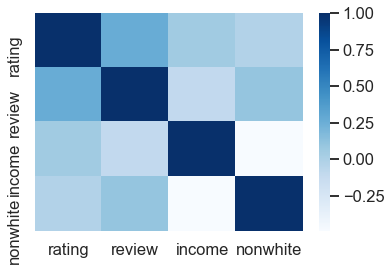

In [57]:
sns.heatmap(mcorr, cmap='Blues',annot=False)
plt.show()

Now to analyze for median income, I made a scatterplot to visualize all the data.

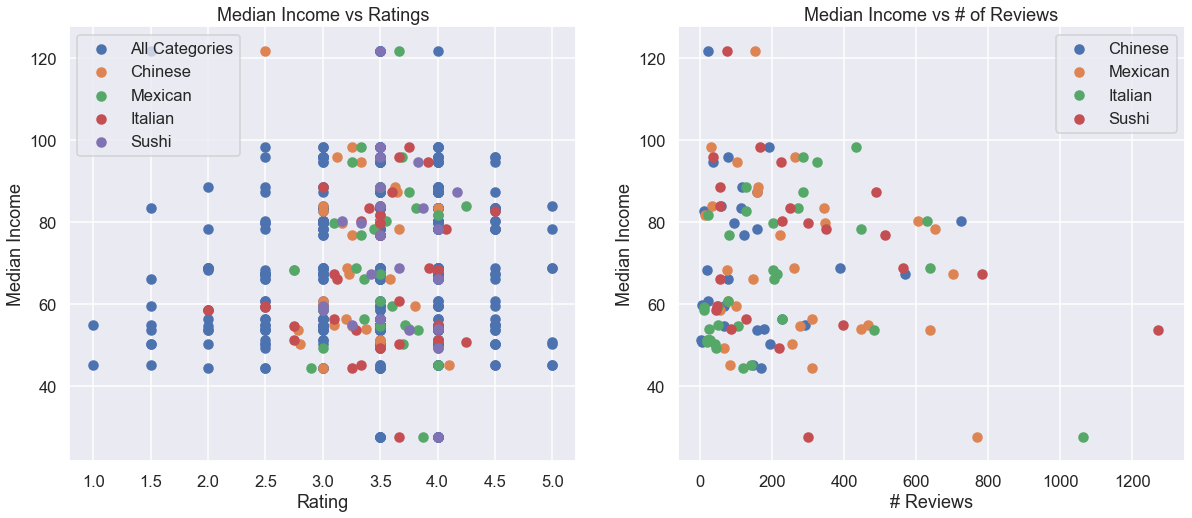

In [36]:
# Plotting income versus ratings to determine if there is a linear relationship
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 8))
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(merged['rating'], merged['median income'])
ax1.scatter(chineseI['avg rating'], chineseI['median income'])
ax1.scatter(mexicanI['avg rating'], mexicanI['median income'])
ax1.scatter(italianI['avg rating'], italianI['median income'])
ax1.scatter(sushiI['avg rating'], sushiI['median income'])
ax1.set_xlabel("Rating")
ax1.set_ylabel("Median Income")
ax1.set_title('Median Income vs Ratings')
ax1.legend(['All Categories','Chinese', 'Mexican','Italian','Sushi'])

# Plotting income versus reviews to determine if there is a linear relationship
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(chineseI['total reviews'], chineseI['median income'])
ax2.scatter(mexicanI['total reviews'], mexicanI['median income'])
ax2.scatter(italianI['total reviews'], italianI['median income'])
ax2.scatter(sushiI['total reviews'], sushiI['median income'])
ax2.set_xlabel("# Reviews")
ax2.set_ylabel("Median Income")
ax2.set_title('Median Income vs # of Reviews')
ax2.legend(['Chinese', 'Mexican','Italian','Sushi'])

plt.show()

I included the unaveraged total in the rating chart to make sure that averages did not play a factor, but did not for the reviews because the reviews total was just a total sum of what is present currently. Both of these graphs do not really show any sign of a linear relationship for any of the categories. There are a few outliers at the larger end of number of reviews, because there are a few restaurants that had a large sum of reviews that far surpassed any of the other restaurants, but as you can see, this does not affect the data that much because there is no relationship otherwise, and taking them out of the dataset did not change the results besides zooming in to a tighter view of their cluster.

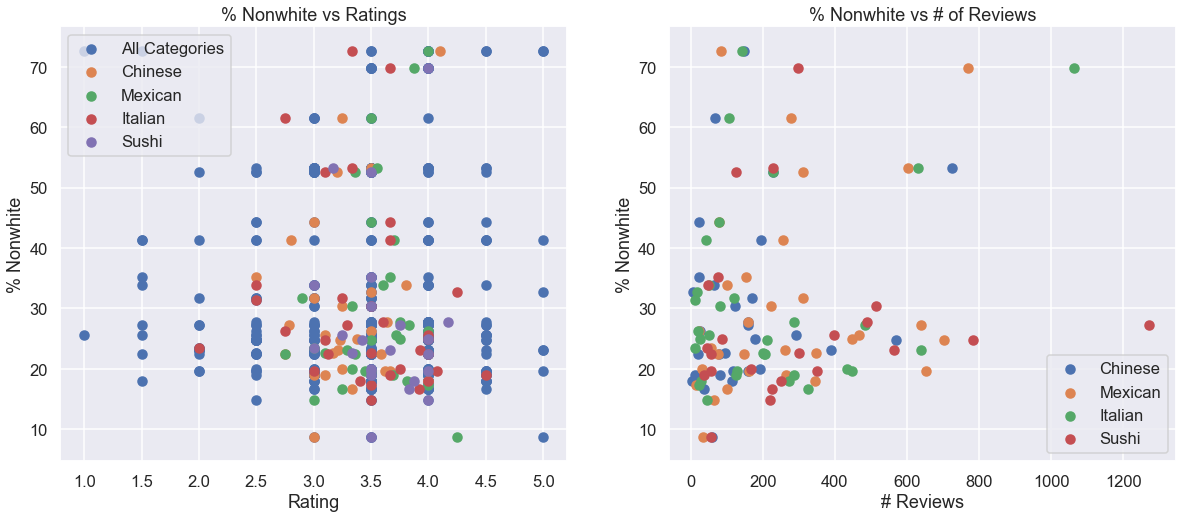

In [37]:
# Plotting income versus ratings to determine if there is a linear relationship
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 8))
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(merged['rating'], merged['% nonwhite'])
ax1.scatter(chineseD['avg rating'], chineseD['% nonwhite'])
ax1.scatter(mexicanD['avg rating'], mexicanD['% nonwhite'])
ax1.scatter(italianD['avg rating'], italianD['% nonwhite'])
ax1.scatter(sushiD['avg rating'], sushiD['% nonwhite'])
ax1.set_xlabel("Rating")
ax1.set_ylabel("% Nonwhite")
ax1.set_title('% Nonwhite vs Ratings')
ax1.legend(['All Categories','Chinese', 'Mexican','Italian','Sushi'])

# Plotting income versus reviews to determine if there is a linear relationship
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(chineseD['total reviews'], chineseD['% nonwhite'])
ax2.scatter(mexicanD['total reviews'], mexicanD['% nonwhite'])
ax2.scatter(italianD['total reviews'], italianD['% nonwhite'])
ax2.scatter(sushiD['total reviews'], sushiD['% nonwhite'])
ax2.set_xlabel('# Reviews')
ax2.set_ylabel('% Nonwhite')
ax2.set_title('% Nonwhite vs # of Reviews')
ax2.legend(['Chinese', 'Mexican','Italian','Sushi'])

plt.show()

There is more of a relationship between the number of reviews and the % nonwhite, or they at least cluster at the start but then go off in different directions, so I separated them by category and added a best fit line to the plots.

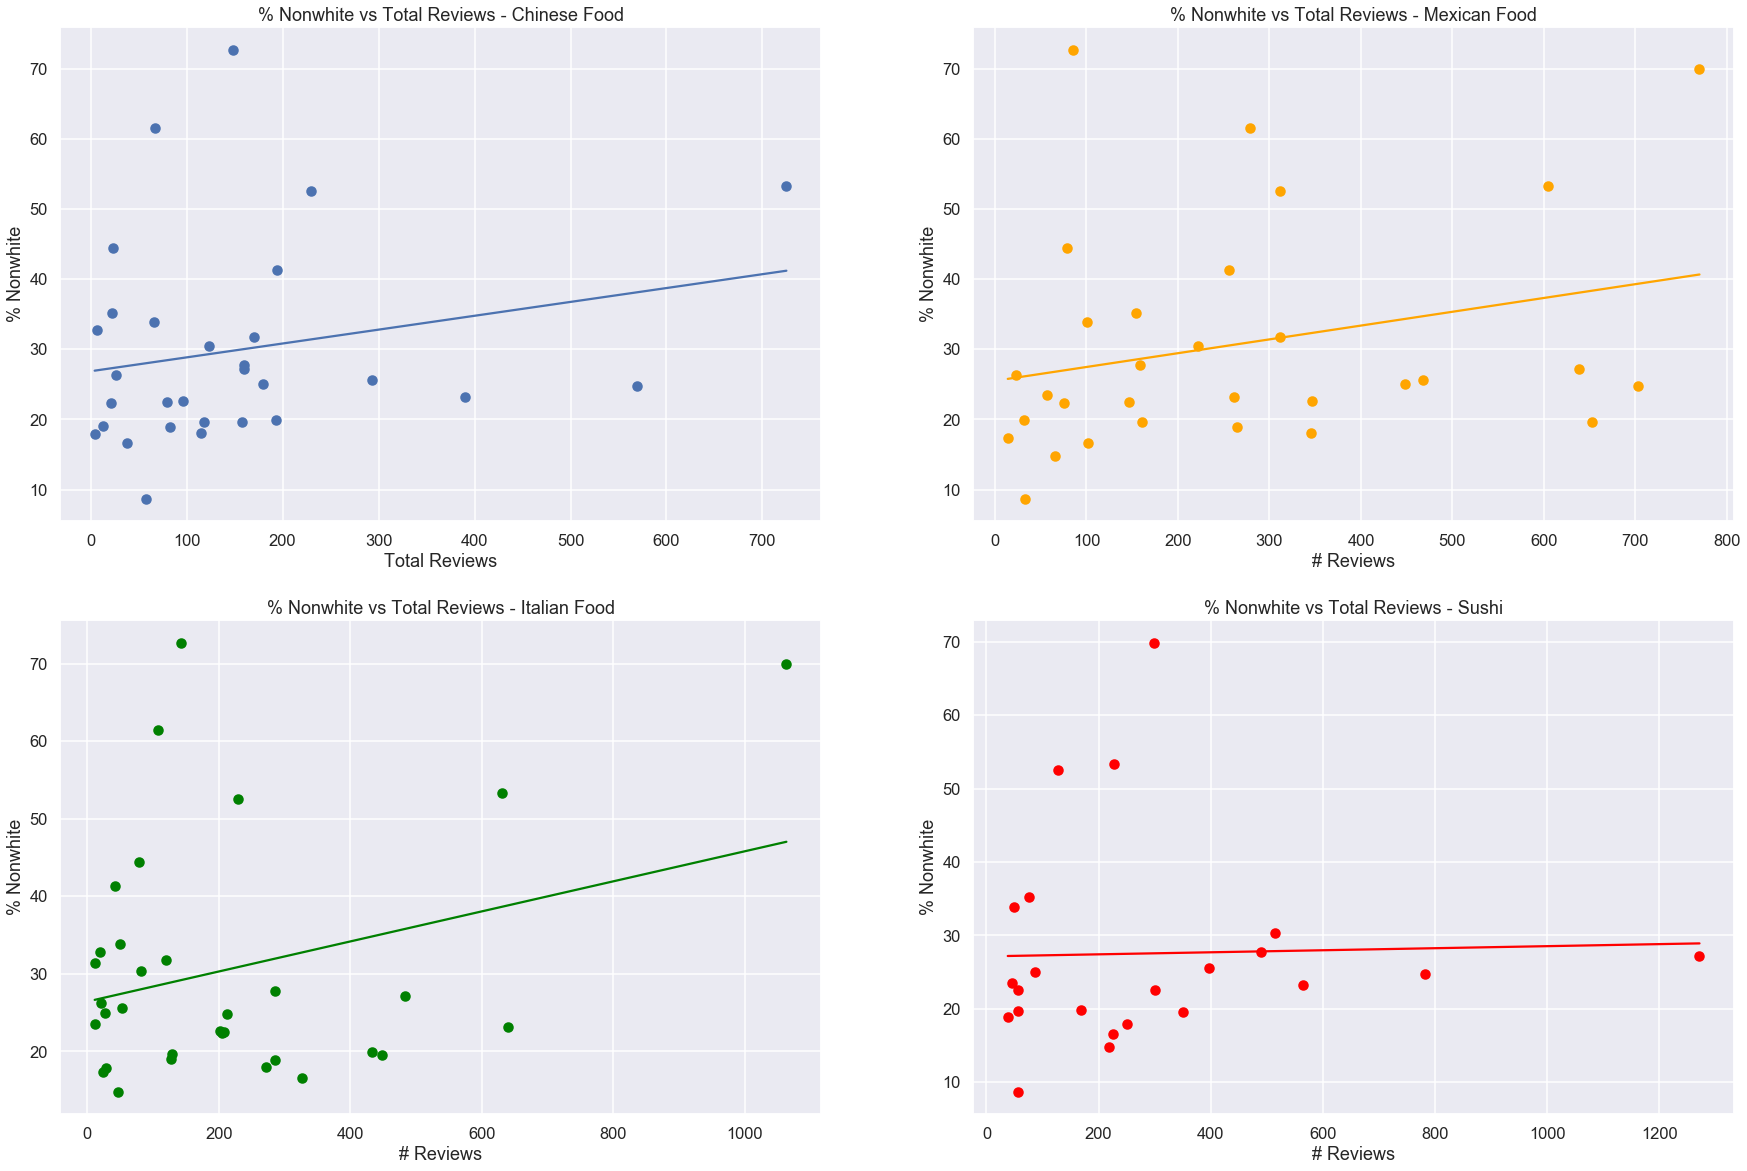

In [38]:
# Plotting income versus ratings to determine if there is a linear relationship
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(30, 20))
ax1 = plt.subplot(2, 2, 1)
ax1.scatter(chineseD['total reviews'], chineseD['% nonwhite'])
ax1.set_xlabel("Total Reviews")
ax1.set_ylabel("% Nonwhite")
ax1.set_title('% Nonwhite vs Total Reviews - Chinese Food')
x1 = chineseD['total reviews'].to_numpy()
y1 = chineseD['% nonwhite'].to_numpy()
p1, p0 = np.polyfit(x1, y1,deg=1)
linear_x1 = np.array([np.min(x1), np.max(x1)])
linear_y1 = p1 * linear_x1 + p0
ax1.plot(linear_x1, linear_y1)

# Plotting income versus reviews to determine if there is a linear relationship
ax2 = plt.subplot(2, 2, 2)
ax2.scatter(mexicanD['total reviews'], mexicanD['% nonwhite'],color='Orange')
ax2.set_xlabel('# Reviews')
ax2.set_ylabel('% Nonwhite')
ax2.set_title('% Nonwhite vs Total Reviews - Mexican Food')
x2 = mexicanD['total reviews'].to_numpy()
y2 = mexicanD['% nonwhite'].to_numpy()
p12, p02 = np.polyfit(x2, y2,deg=1)
linear_x2 = np.array([np.min(x2), np.max(x2)])
linear_y2 = p12 * linear_x2 + p02
ax2.plot(linear_x2, linear_y2, color='Orange')

ax3 = plt.subplot(2,2,3)
ax3.scatter(italianD['total reviews'], italianD['% nonwhite'],color='Green')
ax3.set_xlabel('# Reviews')
ax3.set_ylabel('% Nonwhite')
ax3.set_title('% Nonwhite vs Total Reviews - Italian Food')
x2 = italianD['total reviews'].to_numpy()
y2 = italianD['% nonwhite'].to_numpy()
p12, p02 = np.polyfit(x2, y2,deg=1)
linear_x2 = np.array([np.min(x2), np.max(x2)])
linear_y2 = p12 * linear_x2 + p02
ax3.plot(linear_x2, linear_y2, color='Green')

ax4 = plt.subplot(2,2,4)
ax4.scatter(sushiD['total reviews'], sushiD['% nonwhite'],color='Red')
ax4.set_xlabel('# Reviews')
ax4.set_ylabel('% Nonwhite')
ax4.set_title('% Nonwhite vs Total Reviews - Sushi')
x2 = sushiD['total reviews'].to_numpy()
y2 = sushiD['% nonwhite'].to_numpy()
p12, p02 = np.polyfit(x2, y2,deg=1)
linear_x2 = np.array([np.min(x2), np.max(x2)])
linear_y2 = p12 * linear_x2 + p02
ax4.plot(linear_x2, linear_y2, color='Red')

plt.show()

These don't seem to be the best linear fits for any of the categories, even when filtering out the data by category. This is not surprising, because there is a wide range of kinds of each of these restaurants, from some being more fast food quick bites to sit-down restaurants, and this is a factor that was not factored in, but may explain why there seems to be a wide range for every plot that shows no relationship. 

To numerically prove that there is no clear or significant correlation between our variables (median income and diversity) with ratings, reviews, or types of restaurants, I will conduct linear regression tests. Starting with the median income, both with number of reviews and ratings, I will perform a series of tests that will return values that indicate a strong possible fit or not. I will do this on every relationship covered, and I will be using an alpha value of 0.01.

In [39]:
df_m = merged
df_m.columns = ['rating', 'review', 'category', 'income', 'nonwhite']
chineseD.columns = ['nonwhite', 'rating', 'reviews']
mexicanD.columns = ['nonwhite', 'rating', 'reviews']
italianD.columns = ['nonwhite', 'rating', 'reviews']
sushiD.columns = ['nonwhite', 'rating', 'reviews']
regr = linear_model.LinearRegression()

In [42]:
# For median income versus ratings
outcome, predictors = patsy.dmatrices('rating ~ income', df_m)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.397
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.238
Time:                        21:50:12   Log-Likelihood:                -472.79
No. Observations:                 448   AIC:                             949.6
Df Residuals:                     446   BIC:                             957.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3194      0.134     24.725      0.0

This model has a very low r-squared and a high p-value, a lot higher than our alpha value of 0.01, suggesting that there is not a linear relationship or correlation between rating and income. 

In [44]:
# For median income versus reviews
outcome, predictors = patsy.dmatrices('review ~ income', df_m)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 review   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.994
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0463
Time:                        21:50:12   Log-Likelihood:                -2562.8
No. Observations:                 448   AIC:                             5130.
Df Residuals:                     446   BIC:                             5138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.5186     14.257      6.069      0.0

Another very low  R-squared, demonstrating that there is no significant linear relationship between median income and Yelp reviews either. The p-value here is 0.04, which is still higher than a 0.01 alpha value.

In [45]:
# Now for % nonwhite, lets start with ratings
outcome, predictors = patsy.dmatrices('rating ~ nonwhite', df_m)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

Coefficients:  [[-0.00079304]]
Intercept:  [3.49763466]
Variance score: 0.00
Mean absolute error: 0.51
Residual sum of squares (MSE): 0.48
R2-score: -3476.54
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1283
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.720
Time:                        21:50:12   Log-Likelihood:                -473.43
No. Observations:                 448   AIC:                             950.9
Df Residuals:                     446   BIC:                             959.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|

R-squared is 0, which indicates very, very little relationship existing here, and p-value is still much larger than 0.01 (0.72 > 0.01), so again, no linear relationship. 

For the rest of the % nonwhite, I am going to first use the merged data, and then test each of the indivdual categories, because they showed the most sign of any relationship at all.

In [46]:
# % nonwhite and merged dataset (all categories)
outcome, predictors = patsy.dmatrices('review ~ nonwhite', df_m)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

Coefficients:  [[0.52259721]]
Intercept:  [42.80247814]
Variance score: 0.01
Mean absolute error: 48.01
Residual sum of squares (MSE): 5437.81
R2-score: -88.85
                            OLS Regression Results                            
Dep. Variable:                 review   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.964
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0264
Time:                        21:50:12   Log-Likelihood:                -2562.3
No. Observations:                 448   AIC:                             5129.
Df Residuals:                     446   BIC:                             5137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

In [47]:
# For % nonwhite versus reviews for specifically chinese restaurants
outcome, predictors = patsy.dmatrices('reviews ~ nonwhite', chineseD)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

Coefficients:  [[2.51752231]]
Intercept:  [75.6769005]
Variance score: 0.05
Mean absolute error: 105.01
Residual sum of squares (MSE): 24441.41
R2-score: -18.11
                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.465
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.236
Time:                        21:50:12   Log-Likelihood:                -194.13
No. Observations:                  30   AIC:                             392.3
Df Residuals:                      28   BIC:                             395.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      

In [49]:
# For % nonwhite versus reviews for specifically mexican restaurants
outcome, predictors = patsy.dmatrices('reviews ~ nonwhite', mexicanD)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

Coefficients:  [[3.69498274]]
Intercept:  [150.16851354]
Variance score: 0.07
Mean absolute error: 173.04
Residual sum of squares (MSE): 43754.05
R2-score: -11.76
                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.274
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.142
Time:                        21:50:28   Log-Likelihood:                -209.63
No. Observations:                  31   AIC:                             423.3
Df Residuals:                      29   BIC:                             426.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t    

In [50]:
# For % nonwhite versus reviews for specifically italian restaurants
outcome, predictors = patsy.dmatrices('reviews ~ nonwhite', italianD)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

Coefficients:  [[4.41156887]]
Intercept:  [78.39546916]
Variance score: 0.09
Mean absolute error: 175.12
Residual sum of squares (MSE): 47893.30
R2-score: -9.70
                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2.897
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0987
Time:                        21:50:32   Log-Likelihood:                -224.64
No. Observations:                  33   AIC:                             453.3
Df Residuals:                      31   BIC:                             456.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      

In [51]:
# For % nonwhite versus reviews for specifically sushi restaurants
outcome, predictors = patsy.dmatrices('reviews ~ nonwhite', sushiD)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

Coefficients:  [[0.6093378]]
Intercept:  [272.4288103]
Variance score: 0.00
Mean absolute error: 206.00
Residual sum of squares (MSE): 81479.31
R2-score: -1177.84
                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                   0.01781
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.895
Time:                        21:50:32   Log-Likelihood:                -162.68
No. Observations:                  23   AIC:                             329.4
Df Residuals:                      21   BIC:                             331.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t    

Now having tested every possible combination of relationship that I was curious about, and none of the data proved that there exists a significant correlation between income or diversity when compared to ethnic restaurants' reviews and ratings. None of the linear modeling tests had an r-squared value close to 0.5 or greater, which is the ideal r-squared value to indicate that the data has a good fit with your model. Furthermore, every p-value was larger than our alpha 0.01, indicating again that a linear relationship is a bad model for this data.

# Ethics & Privacy

Permission to the dataset:
I assume that "zipcodes.csv" comes from the government of North Carolina, because most of the zip codes seem to be from around there, and because it is published by the government, it is public for anyone to use. Demographic data is made public in general, so this would not be an issue. "yelp.csv is conglomerated information that is taken directly from Yelp, a public website that anyone can access, so this would not be an issue.

Privacy Concern:
"zipcodes.csv" is intended to be public, because the government collects this information as part of the census and other surveys, and uses this information to help allocate resources depending on what is needed. Because the government posts this data, it is already stripped of anything that could possibly be personal, because it is  demographics per zip code, not demographics of individual people. Nonetheless, I stripped the zip codes once merging the datasets, and used the zip codes only as a common identifier, so what could be a light privacy concern was stripped regardless. "yelp.csv" includes lots of business information on restaurants, which are already available, including variables like their name, phone number, address, and others. This information is already very readily available, but I still took out all identifying features besides what type of place it was, and the ratings and reviews it got, but there is no way of knowing which restaurant is which from the merged dataset. 

Potential Biases:
County biases
There is a strong bias based on the fact that this dataset is a specific set of zip codes, and these zip codes are not evenly distributed to a variety of places. The zip codes are primarily from one county, and the county's demographics is not indicative of society as a whole, meaning that this data is biased towards what is true for this county, and further analysis on a broader range of zip codes would need to be done to use any results on a general scale. I took this into account when analyzing the data, knowing that this analysis applied to this specific county. 

# Conclusion & Discussion

This report was designed to explore the relationships between income and diversity with ratings and reviews of ethnic restaurants. Using two datasets, one having zip code data and its corresponding levels of nonwhite residents and median income levels, and the other being a conglomerate of data from Yelp in a similar zip code area to the first dataset. In an ideal world, the zip code dataset would be far more expansive, because 38 observations from a tight and small subset of the population--only one county--is not a good way to indicate any general relationship. An ideal dataset would include zip codes from many different counties with a wide range of demographics. Previous studies have explored the relationship between fast food and income, restaurant growth and income, and fast food and race, but none have gone into the ratings and reviews of these restaurants. 

I hypothesized that there would be a relationship between at least income and ratings, because I thought that higher rated restaurants would be more prevalent in higher income neighborhoods, but the results showed otherwise. The results have demonstrated that there is no significant evidence to suggest a linear relationship between any of these elements, whether it be the type of cuisine, number of reviews, or demographics of a neighborhood. 

More studies however should be conducted to similar questions to see if there is a relationship between cuisine and income and/or race. An ideal Yelp dataset would have more cuisines listed to look from, and variables of the demographics of who is making these reviews--where they are from, whether they are visitors or tourists or frequent often, and how often they review on Yelp in general, to give more weight to certain reviews over others and take into account that many do not take time to rate and review on Yelp, which skews the data to being what the reviewers believe.